<a href="https://colab.research.google.com/github/VinitKurtarkar/Spam_Classification/blob/main/SpamClassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mail = pd.read_csv('/content/drive/MyDrive/Projects/spam.csv', encoding='latin-1')

In [ ]:
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
mail.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
mail.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [ ]:
mail.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
mail['target'] = encoder.fit_transform(mail['target'])

In [ ]:
mail.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail.isnull().sum()

,0
target,0
text,0


In [ ]:
mail.duplicated().sum()

403

In [ ]:
mail = mail.drop_duplicates(keep='first')

In [ ]:
mail.duplicated().sum()

0

In [ ]:
mail['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7ece37d5ea70>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

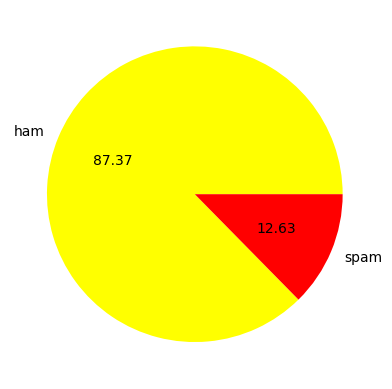

In [ ]:
from enum import auto
plt.pie(mail['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=['yellow','red'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
mail['no_char'] = mail['text'].apply(len)
mail['no_words'] = mail['text'].apply(lambda x:len(nltk.word_tokenize(x)))
mail['no_sent'] = mail['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
mail.head()

,target,text,no_char,no_words,no_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
mail[['no_char','no_words','no_sent']].describe()

,no_char,no_words,no_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
mail[mail['target']==0][['no_char','no_words','no_sent']].describe()

,no_char,no_words,no_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
mail[mail['target']==1][['no_char','no_words','no_sent']].describe()

,no_char,no_words,no_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_char', ylabel='Count'>

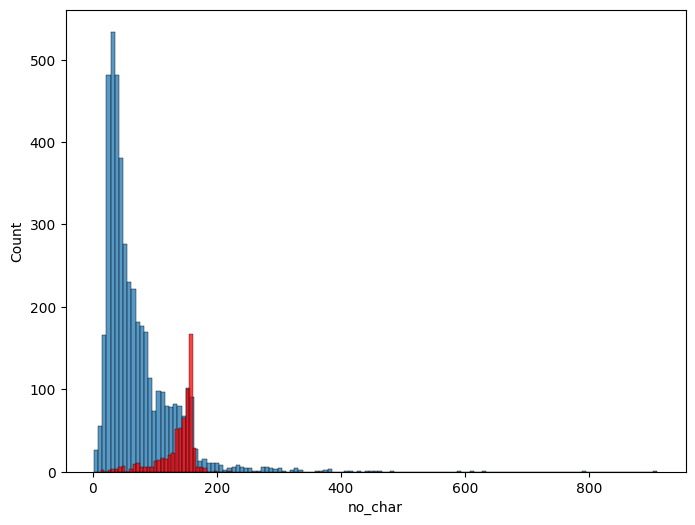

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(mail[mail['target']==0]['no_char'])
sns.histplot(mail[mail['target']==1]['no_char'], color = 'red')

<Axes: xlabel='no_words', ylabel='Count'>

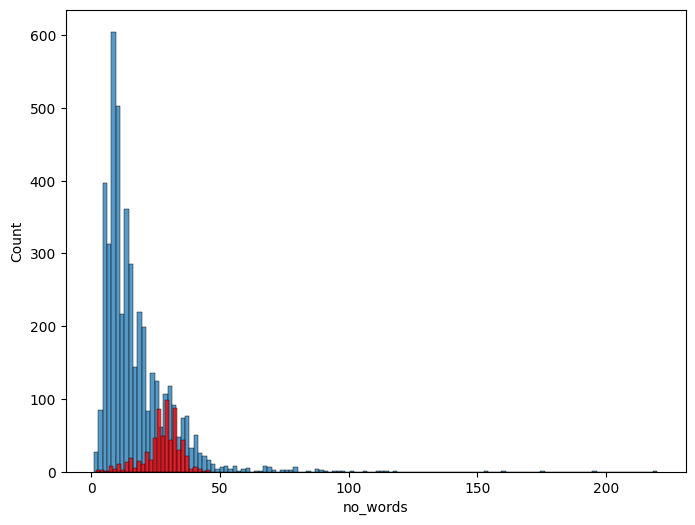

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(mail[mail['target']==0]['no_words'])
sns.histplot(mail[mail['target']==1]['no_words'], color = 'red')

<Axes: xlabel='no_sent', ylabel='Count'>

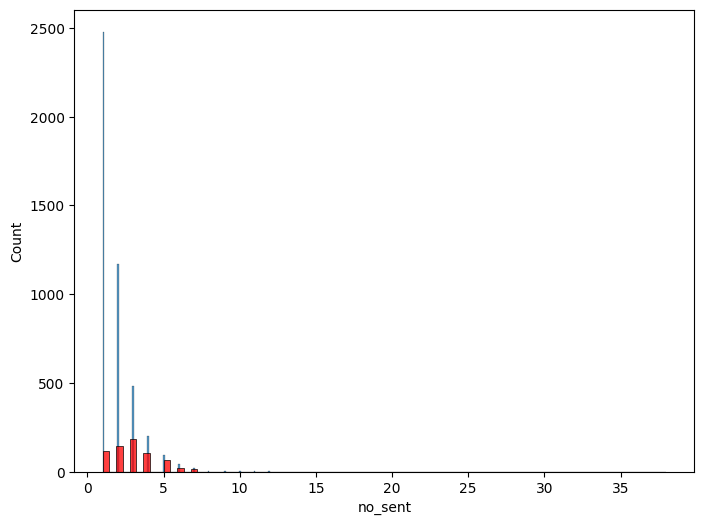

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(mail[mail['target']==0]['no_sent'])
sns.histplot(mail[mail['target']==1]['no_sent'], color = 'red')

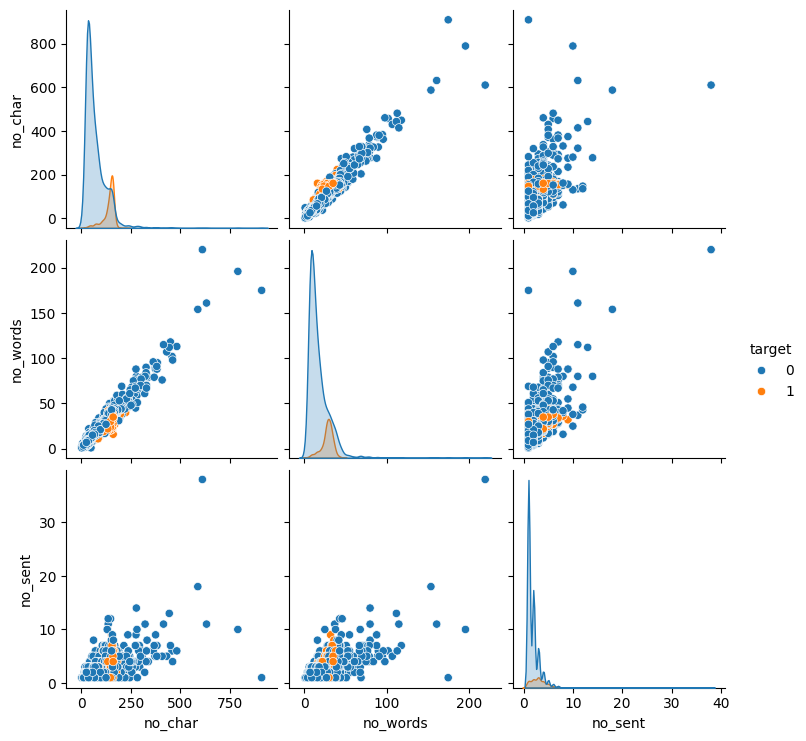

In [ ]:
sns.pairplot(mail,hue='target')

<Axes: >

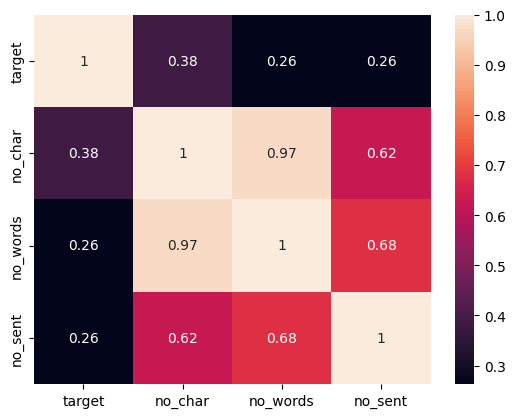

In [ ]:
# Convert or drop non-numeric columns before calculating correlation
mail_numeric = mail.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(mail_numeric.corr(), annot=True)

In [ ]:
from nltk import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def prepro(txt):
  txt = txt.lower()
  txt = nltk.word_tokenize(txt)

  y=[]
  for char in txt:
    if char.isalnum():
      y.append(char)

  txt = y[:]
  y.clear()

  for w in txt:
    if w not in stopwords.words('english') and w not in string.punctuation:
      y.append(w)

  txt = y[:]
  y.clear()

  for i in txt:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
mail['transformed'] = mail['text'].apply(prepro)

In [ ]:
mail.head()

,target,text,no_char,no_words,no_sent,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

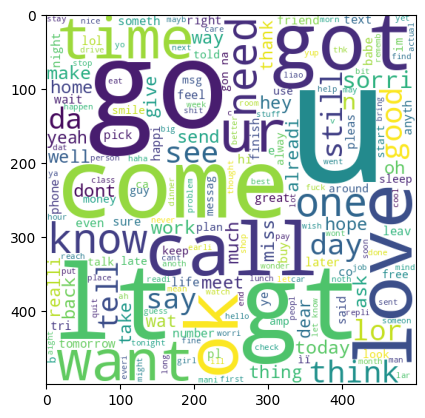

In [ ]:
h = wc.generate(mail[mail['target']==0]['transformed'].str.cat(sep=" "))
plt.imshow(h)

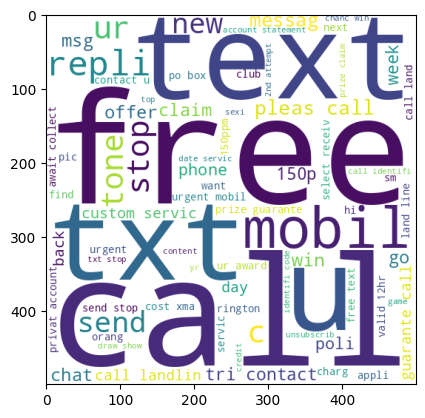

In [ ]:
s = wc.generate(mail[mail['target']==1]['transformed'].str.cat(sep=" "))
plt.imshow(s)

In [ ]:
ham=[]
for msg in mail[mail['target']==0]['transformed'].tolist():
  for w in msg.split():
    ham.append(w)

In [ ]:
len(ham)

35404

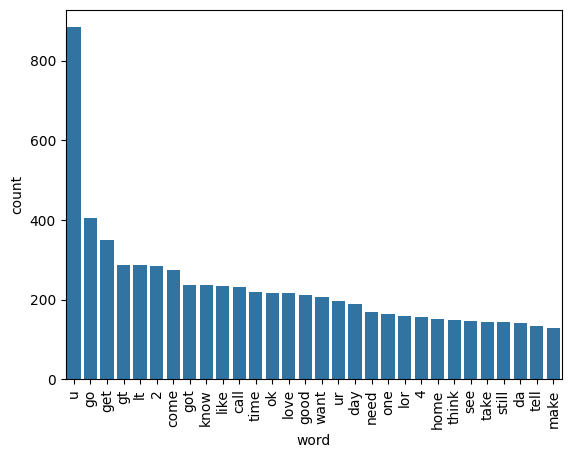

In [ ]:
from collections import Counter
# Create a DataFrame from the Counter object
ham_counts = pd.DataFrame(Counter(ham).most_common(30), columns=['word', 'count'])

# Use the 'x' and 'y' keyword arguments to specify the columns for the barplot
sns.barplot(x='word', y='count', data=ham_counts)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
spam=[]
for msg in mail[mail['target']==1]['transformed'].tolist():
  for w in msg.split():
    spam.append(w)

In [ ]:
len(spam)

9939

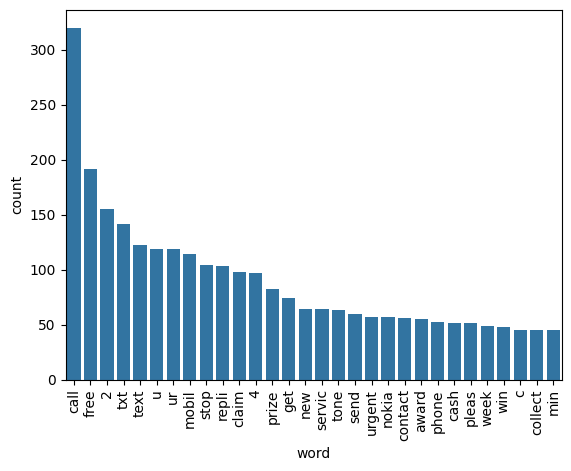

In [ ]:
# Create a DataFrame from the Counter object
spam_counts = pd.DataFrame(Counter(spam).most_common(30), columns=['word', 'count'])

# Use the 'x' and 'y' keyword arguments to specify the columns for the barplot
sns.barplot(x='word', y='count', data=spam_counts)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(mail['transformed']).toarray()

In [ ]:
y = mail['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
